In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation
from tensorflow.python import metrics
from keras import preprocessing 
from keras.preprocessing import image
import cv2
import os
import matplotlib.pyplot as plt
import random

In [49]:
DIRECTORY= r"C:\Users\ASUS\Downloads\dataset3"
CATAGORIES=['no_cancer','cancer','smoking']

In [50]:
data=[]

for catagories in CATAGORIES:
    folder=os.path.join(DIRECTORY,catagories)
    label=CATAGORIES.index(catagories)
    
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(100,100))
        #plt.imshow(img_arr)
        
        data.append([img_arr,label])
        


In [51]:
data

[[array([[[61, 61, 61],
          [61, 61, 61],
          [61, 61, 61],
          ...,
          [61, 61, 61],
          [61, 61, 61],
          [61, 61, 61]],
  
         [[61, 61, 61],
          [61, 61, 61],
          [61, 61, 61],
          ...,
          [61, 61, 61],
          [61, 61, 61],
          [61, 61, 61]],
  
         [[61, 61, 61],
          [61, 61, 61],
          [61, 61, 61],
          ...,
          [61, 61, 61],
          [61, 61, 61],
          [61, 61, 61]],
  
         ...,
  
         [[61, 61, 61],
          [61, 61, 61],
          [61, 61, 61],
          ...,
          [61, 61, 61],
          [61, 61, 61],
          [61, 61, 61]],
  
         [[61, 61, 61],
          [61, 61, 61],
          [61, 61, 61],
          ...,
          [61, 61, 61],
          [61, 61, 61],
          [61, 61, 61]],
  
         [[61, 61, 61],
          [61, 61, 61],
          [61, 61, 61],
          ...,
          [61, 61, 61],
          [61, 61, 61],
          [61, 61, 61]]], dtype=u

In [52]:
dir_path = r'C:\Users\ASUS\Downloads\dataset3\no_cancer'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('no_cancer:', count)

dir_path = r'C:\Users\ASUS\Downloads\dataset3\cancer'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('cancer:', count)

dir_path = r'C:\Users\ASUS\Downloads\dataset3\Smoking'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('smoking:', count)




no_cancer: 575
cancer: 186
smoking: 38


In [53]:

train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    validation_split = 0.1
)
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.1   
)
train_data_gen = train_data_gen.flow_from_directory(
    r'C:\Users\ASUS\Downloads\dataset3',
    target_size = (100, 100),
    batch_size = 10,
    subset = 'training'
)
test_data_gen =test_data_gen.flow_from_directory(
    r'C:\Users\ASUS\Downloads\dataset3',
    target_size = (100, 100),
    batch_size = 10,
    subset = 'validation'
)


Found 722 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


In [54]:
random.shuffle(data)

In [55]:
x=[]
y=[]

for features,label in data:
    x.append(features)
    y.append(label)

In [56]:
x=np.array(x)
y=np.array(y)

In [57]:
x=x/255

In [58]:
x.shape

(799, 100, 100, 3)

In [59]:
model=Sequential()
model.add(Conv2D(filters = 32,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape = x.shape[1:]))
model.add(Conv2D(filters = 32,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape = x.shape[1:]))

model.add(Conv2D(filters = 32,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape = x.shape[1:]))

model.add(MaxPooling2D(pool_size=2, strides= 2))

model=Sequential()
model.add(Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape = x.shape[1:]))
model.add(Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape =x.shape[1:]))

model.add(Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape = x.shape[1:]))

model.add(MaxPooling2D(pool_size=2, strides= 2))

model=Sequential()
model.add(Conv2D(filters = 128,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape = x.shape[1:]))
model.add(Conv2D(filters = 128,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape =x.shape[1:]))

model.add(Conv2D(filters = 128,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape = x.shape[1:]))

model.add(MaxPooling2D(pool_size=2, strides= 2))


model.add(Flatten())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 50, 50, 128)       3584      
                                                                 
 conv2d_25 (Conv2D)          (None, 25, 25, 128)       147584    
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                46090     
                                                      

In [60]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [61]:
history=model.fit(
    x,y,
    epochs=15,
    validation_split=0.1)


Epoch 1/15
23/23 [==============================] - 16s 545ms/step - loss: 0.7177 - accuracy: 0.7149 - val_loss: 0.5947 - val_accuracy: 0.7625
Epoch 2/15
23/23 [==============================] - 12s 543ms/step - loss: 0.3333 - accuracy: 0.8846 - val_loss: 0.3689 - val_accuracy: 0.8500
Epoch 3/15
23/23 [==============================] - 12s 538ms/step - loss: 0.2546 - accuracy: 0.9054 - val_loss: 0.1906 - val_accuracy: 0.9625
Epoch 4/15
23/23 [==============================] - 12s 521ms/step - loss: 0.2234 - accuracy: 0.9138 - val_loss: 0.1695 - val_accuracy: 0.9625
Epoch 5/15
23/23 [==============================] - 12s 535ms/step - loss: 0.1350 - accuracy: 0.9499 - val_loss: 0.1230 - val_accuracy: 0.9375
Epoch 6/15
23/23 [==============================] - 12s 533ms/step - loss: 0.1017 - accuracy: 0.9541 - val_loss: 0.1480 - val_accuracy: 0.9375
Epoch 7/15
23/23 [==============================] - 12s 526ms/step - loss: 0.1296 - accuracy: 0.9569 - val_loss: 0.1306 - val_accuracy: 0.9375

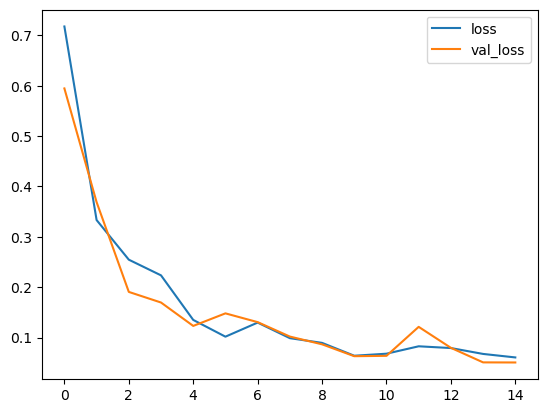

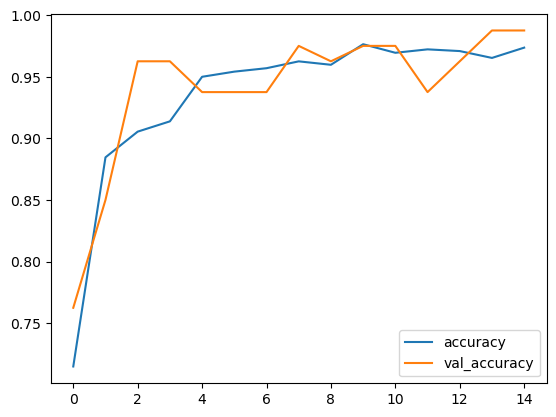

In [62]:
history = pd.DataFrame(history.history)
history.loc[:,['loss','val_loss']].plot()
history.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

<AxesSubplot:>

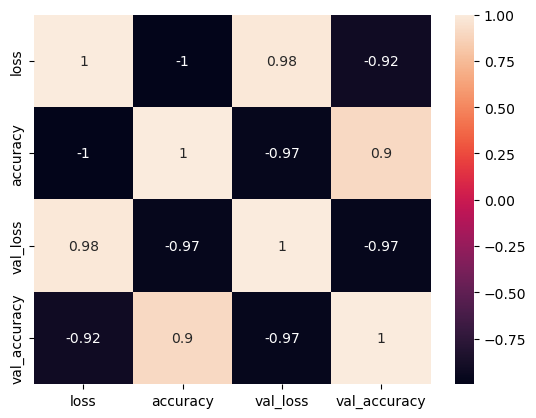

In [63]:
import seaborn as sns
sns.heatmap(history.corr(),annot=True)

In [64]:
x_train,y_train=next(train_data_gen)
x_test,y_test= next(test_data_gen)

In [65]:
y_val_predicted = model.predict(x_test)
y_val = [np.argmax(i) for i in y_test]
y_predicted = [np.argmax(i) for i in y_val_predicted]

1/1 [==============================] - 0s 204ms/step


Text(70.72222222222221, 0.5, 'True ')

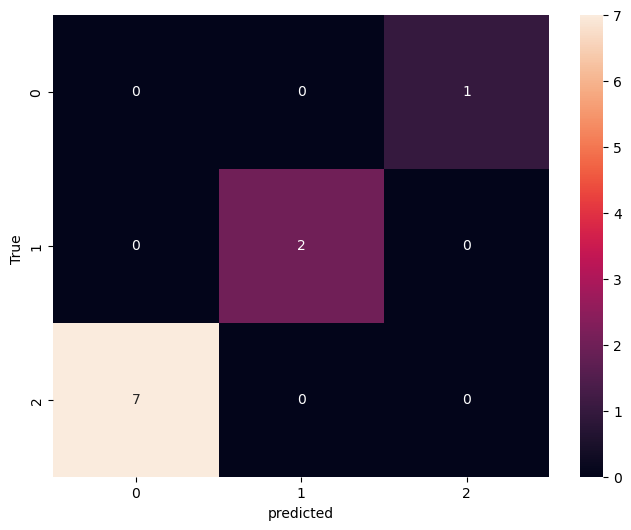

In [66]:
cm = tf.math.confusion_matrix(y_val, y_predicted)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('True ')

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         7

    accuracy                           0.20        10
   macro avg       0.33      0.33      0.33        10
weighted avg       0.20      0.20      0.20        10



In [69]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

img_pred = image.load_img(r"C:\Users\ASUS\Downloads\dataset3\test\008.jpg",target_size=(100,100))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

rslt=model.predict(img_pred)

print(rslt)
if(rslt[0][0]>rslt[0][1]):
  prediction="no_cancer"

else:
  prediction="cancer"


print(prediction)


print(rslt)
if(rslt[0][1]<rslt[0][2]):
  prediction="smoking"

else:
  prediction="no smoking"

print(prediction)



1/1 [==============================] - 0s 207ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
cancer
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
smoking
